In [1]:
import pandas as pd
import numpy as np
import tqdm
import os
import math
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, KFold
import pickle

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv(
    dataset/assist2017/anonymized_full_release_competition_dataset.csv',
    usecols=['startTime', 'studentId', 'skill', 'problemId','timeTaken', 'correct']
).dropna(subset=['skill', 'problemId']).sort_values(['studentId', 'startTime'])

data.timeTaken = data.timeTaken.astype(int)

In [5]:
data

,studentId,skill,problemId,startTime,timeTaken,correct
0,8,properties-of-geometric-figures,1118,1096470301,49,0
1,8,properties-of-geometric-figures,1119,1096470350,3,1
2,8,sum-of-interior-angles-more-than-3-sides,1120,1096470354,6,0
3,8,sum-of-interior-angles-more-than-3-sides,1120,1096470360,17,0
4,8,sum-of-interior-angles-more-than-3-sides,1121,1096470378,1,1
...,...,...,...,...,...,...
942811,7783,mean,2272,1147447464,4,1
942812,7783,mean,2273,1147447468,70,0
942813,7783,mean,2273,1147447539,4,0
942814,7783,mean,2273,1147447543,3,1


In [6]:
students = data.studentId.unique().tolist()
filtered_data = data[data['studentId']==8][:500].copy()
students.remove(8)
for i in students:
    sample = data[data['studentId']==i].copy()
    if len(sample) < 10:
        continue
    filtered_data = pd.concat([filtered_data, sample[0:500]],  ignore_index = True)
data = filtered_data

In [7]:
data

,studentId,skill,problemId,startTime,timeTaken,correct
0,8,properties-of-geometric-figures,1118,1096470301,49,0
1,8,properties-of-geometric-figures,1119,1096470350,3,1
2,8,sum-of-interior-angles-more-than-3-sides,1120,1096470354,6,0
3,8,sum-of-interior-angles-more-than-3-sides,1120,1096470360,17,0
4,8,sum-of-interior-angles-more-than-3-sides,1121,1096470378,1,1
...,...,...,...,...,...,...
633777,7783,mean,2272,1147447464,4,1
633778,7783,mean,2273,1147447468,70,0
633779,7783,mean,2273,1147447539,4,0
633780,7783,mean,2273,1147447543,3,1


In [8]:
def get_shortest_sequence(df):
    students = df.studentId.unique()
    shortest  = len(df[df['studentId']==8])
    the_sid  = 0
    for sid in students:
        sid_len = len(df[df['studentId']==sid])
        if sid_len < shortest:
            shortest = sid_len
            the_sid = sid
    return shortest , the_sid
shortest_sequence, s_sid = get_shortest_sequence(data)

In [9]:
def get_longest_sequence(df):
    students = df.studentId.unique()
    longest  = 0
    the_sid  = 0
    for sid in students:
        sid_len = len(df[df['studentId']==sid])
        if sid_len > longest:
            longest = sid_len
            the_sid = sid
    return longest , the_sid
longest_sequence, l_sid = get_longest_sequence(data)

In [10]:
skills = data.skill.unique().tolist()
students = data.studentId.unique().tolist()
problems = data.problemId.unique().tolist()
skill2id = { p: i+1 for i, p in enumerate(skills) }
problem2id = { p: i+1 for i, p in enumerate(problems) }
student2id = {p: i for i, p in enumerate(students)}
print("number of skills: %d" % len(skills))
print("number of problems: %d" % len(problems))
print("number of students: %d" % len(data.studentId.unique()))
print("length of the longest sequence: %d" % longest_sequence)
print("studentId of the longest sequence: %d" % l_sid)
print("length of the shortest sequence: %d" % shortest_sequence)
print("studentId of the shortest sequence: %d" % s_sid)

number of skills: 101
number of problems: 2755
number of students: 1708
length of the longest sequence: 500
studentId of the longest sequence: 8
length of the shortest sequence: 12
studentId of the shortest sequence: 1667


In [11]:
with open("skill2id.pkl", "wb") as f:
    pickle.dump(skill2id, f)
with open("problem2id.pkl", "wb") as f:
    pickle.dump(problem2id, f)

In [12]:
Q_matrix = np.zeros((len(problems)+1,len(skills)+1))
for s, p in zip(np.array(data.skill), np.array(data.problemId)):
    Q_matrix[problem2id[p],skill2id[s]] = 1
np.savetxt('matrix/Assist2017/new/Q_matrix.txt', Q_matrix)

Q_matrix_idx = np.zeros((len(problems)+1,len(skills)+1))
for s, p in zip(np.array(data.skill), np.array(data.problemId)):
    Q_matrix_idx[problem2id[p],skill2id[s]] = skill2id[s]
np.savetxt('/Assist2017/new/Q_matrix_idx.txt', Q_matrix_idx)

## Attempts

In [13]:
data = data.sort_values(['studentId','problemId','startTime'])

In [14]:
ha_try = [0 for x in range(len(data))]
plist =  np.array(data.problemId)
for i in range(1,len(data)):
    if plist[i] == plist[i-1]:
        ha_try[i] = ha_try[i-1]+1
    else:
        continue
data['ha_try']=ha_try

In [15]:
data = data.sort_values(['studentId', 'startTime'])

In [16]:
ca_try = [0 for x in range(len(data))]
plist =  np.array(data.problemId)
for i in range(1,len(data)):
    if plist[i] == plist[i-1]:
        ca_try[i] = ca_try[i-1]+1
    else:
        continue
data['ca_try']=ca_try

In [17]:
data['ha_try'] = data['ha_try'].apply(lambda x: min(x, 10))
data['ca_try'] = data['ca_try'].apply(lambda x: min(x, 10))

In [18]:
data

,studentId,skill,problemId,startTime,timeTaken,correct,ha_try,ca_try
0,8,properties-of-geometric-figures,1118,1096470301,49,0,0,0
1,8,properties-of-geometric-figures,1119,1096470350,3,1,0,0
2,8,sum-of-interior-angles-more-than-3-sides,1120,1096470354,6,0,0,0
3,8,sum-of-interior-angles-more-than-3-sides,1120,1096470360,17,0,1,1
4,8,sum-of-interior-angles-more-than-3-sides,1121,1096470378,1,1,0,0
...,...,...,...,...,...,...,...,...
633777,7783,mean,2272,1147447464,4,1,3,3
633778,7783,mean,2273,1147447468,70,0,0,0
633779,7783,mean,2273,1147447539,4,0,1,1
633780,7783,mean,2273,1147447543,3,1,2,2


In [19]:
data = data.sort_values(['studentId', 'startTime'])

## IntervalTime

In [20]:
intervaltime = [1 for x in range(len(data))]
studentlist =  np.array(data.studentId)
timelist =  np.array(data.startTime)
for i in range(1,len(data)):
    if studentlist[i] == studentlist[i-1]:
        raw_time = (timelist[i]-timelist[i-1])//60
        if raw_time <=43200:
            
            if raw_time <=60:
                intervaltime[i]=1
            elif raw_time <=1440:
                intervaltime[i]=2
            elif raw_time<=4320:
                intervaltime[i]=3
            elif raw_time<=10080:
                intervaltime[i]=4
            elif raw_time<=21600:
                intervaltime[i]=5
            elif raw_time<=43200:
                intervaltime[i]=6
        else:
            intervaltime[i]=7
    else:
        continue
data['intervaltime']=intervaltime

In [21]:
data

,studentId,skill,problemId,startTime,timeTaken,correct,ha_try,ca_try,intervaltime
0,8,properties-of-geometric-figures,1118,1096470301,49,0,0,0,1
1,8,properties-of-geometric-figures,1119,1096470350,3,1,0,0,1
2,8,sum-of-interior-angles-more-than-3-sides,1120,1096470354,6,0,0,0,1
3,8,sum-of-interior-angles-more-than-3-sides,1120,1096470360,17,0,1,1,1
4,8,sum-of-interior-angles-more-than-3-sides,1121,1096470378,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...
633777,7783,mean,2272,1147447464,4,1,3,3,1
633778,7783,mean,2273,1147447468,70,0,0,0,1
633779,7783,mean,2273,1147447539,4,0,1,1,1
633780,7783,mean,2273,1147447543,3,1,2,2,1


In [22]:
data = data.sort_values(['studentId', 'startTime'])

##  TrainSet

In [23]:
data[data['studentId']==8]

,studentId,skill,problemId,startTime,timeTaken,correct,ha_try,ca_try,intervaltime
0,8,properties-of-geometric-figures,1118,1096470301,49,0,0,0,1
1,8,properties-of-geometric-figures,1119,1096470350,3,1,0,0,1
2,8,sum-of-interior-angles-more-than-3-sides,1120,1096470354,6,0,0,0,1
3,8,sum-of-interior-angles-more-than-3-sides,1120,1096470360,17,0,1,1,1
4,8,sum-of-interior-angles-more-than-3-sides,1121,1096470378,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...
495,8,fractions,356,1105383580,3,0,2,2,1
496,8,fractions,356,1105383583,11,1,3,3,1
497,8,inequality-solving,369,1105383594,43,0,0,0,1
498,8,inequality-solving,370,1105383637,37,0,0,0,1


In [24]:
students = data.studentId.unique().tolist()
train_data = data[data['studentId']==8][:400].copy()
students.remove(8)
for i in students:
    sample = data[data['studentId']==i].copy()
    sample = sample[:math.floor(len(sample)*0.8)]
    train_data = pd.concat([train_data, sample],  ignore_index = True)

In [25]:
train_data

,studentId,skill,problemId,startTime,timeTaken,correct,ha_try,ca_try,intervaltime
0,8,properties-of-geometric-figures,1118,1096470301,49,0,0,0,1
1,8,properties-of-geometric-figures,1119,1096470350,3,1,0,0,1
2,8,sum-of-interior-angles-more-than-3-sides,1120,1096470354,6,0,0,0,1
3,8,sum-of-interior-angles-more-than-3-sides,1120,1096470360,17,0,1,1,1
4,8,sum-of-interior-angles-more-than-3-sides,1121,1096470378,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...
506630,7783,substitution,405,1147445571,10,1,3,3,1
506631,7783,substitution,406,1147445581,10,0,0,0,1
506632,7783,substitution,406,1147445591,1,0,1,1,1
506633,7783,substitution,406,1147445593,0,0,2,2,1


## Speed

In [26]:
train_data['timeTaken'].value_counts().sort_index()

0        9886
1       28763
2       17665
3       34866
4       18938
        ...  
3157        1
3281        1
3510        1
3925        1
9999        1
Name: timeTaken, Length: 1232, dtype: int64

/tmp/ipykernel_888478/1516759368.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.bar(range(num_categories)[0:50], value_counts[0:50])


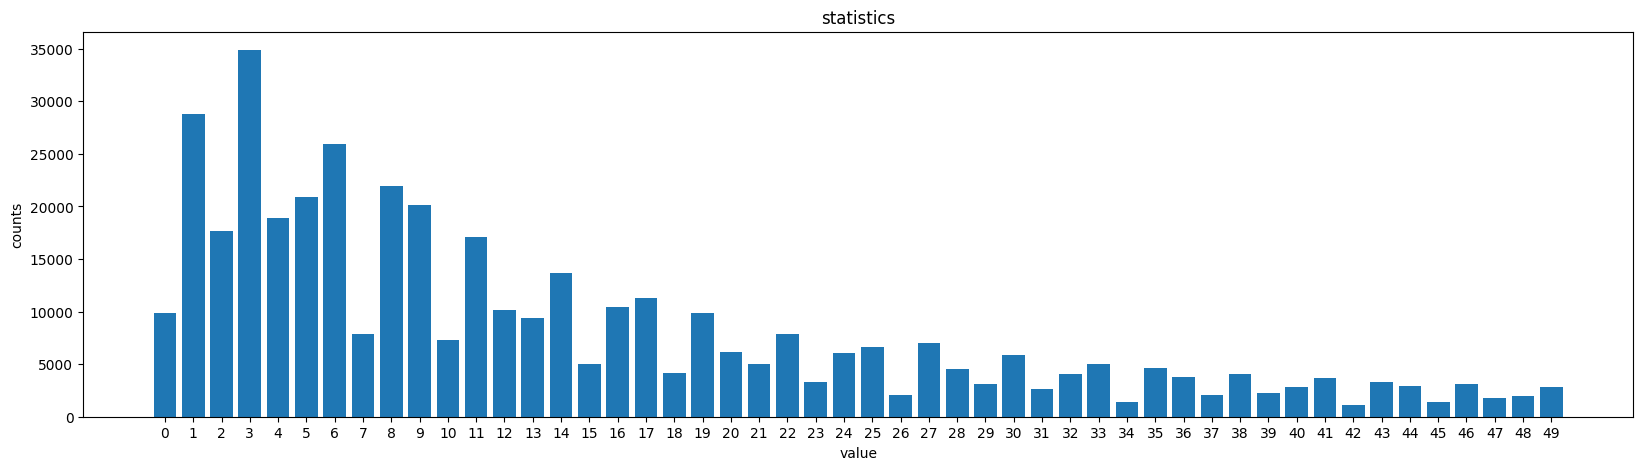

In [27]:
#value_counts = train_data['timeTaken'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(20, 5))
value_counts = train_data['timeTaken'].value_counts().sort_index()
num_categories = len(value_counts)

# 画柱状图
plt.bar(range(num_categories)[0:50], value_counts[0:50])
plt.xticks(range(num_categories)[0:50], value_counts.index[0:50])

plt.xlabel('value')
plt.ylabel('counts')
plt.title('statistics')
plt.show()

In [28]:
data = data.sort_values(['studentId','startTime'])

In [29]:
timetake =  np.array(data.timeTaken)

In [30]:
timetake

array([49,  3,  6, ...,  4,  3, 36])

In [31]:
answertime = []
timetake =  np.array(data.timeTaken)
for raw_time in timetake:
    if raw_time <=300:
        if raw_time <=15:
            answertime.append(1)
        elif raw_time <=30:
            answertime.append(2)
        elif raw_time<=60:
            answertime.append(3)
        elif raw_time<=90:
            answertime.append(4)
        elif raw_time<=120:
            answertime.append(5)  
        elif raw_time<=300:
            answertime.append(6)
    else:
        answertime.append(7)
data['speed']=answertime

In [32]:
data

,studentId,skill,problemId,startTime,timeTaken,correct,ha_try,ca_try,intervaltime,speed
0,8,properties-of-geometric-figures,1118,1096470301,49,0,0,0,1,3
1,8,properties-of-geometric-figures,1119,1096470350,3,1,0,0,1,1
2,8,sum-of-interior-angles-more-than-3-sides,1120,1096470354,6,0,0,0,1,1
3,8,sum-of-interior-angles-more-than-3-sides,1120,1096470360,17,0,1,1,1,2
4,8,sum-of-interior-angles-more-than-3-sides,1121,1096470378,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
633777,7783,mean,2272,1147447464,4,1,3,3,1,1
633778,7783,mean,2273,1147447468,70,0,0,0,1,4
633779,7783,mean,2273,1147447539,4,0,1,1,1,1
633780,7783,mean,2273,1147447543,3,1,2,2,1,1


## QuestionDiffiulty

In [33]:
def get_problem_difficulty(df):
    p2d = {}
    plist = df.problemId.unique().tolist()
    for pid in plist:
        pid_data = df[df['problemId']==pid].sort_values(['studentId','startTime'])
        sequence_len = len(pid_data)
        if(sequence_len < 10):
            continue
        else:
            d = len(pid_data[pid_data['correct']==1])/sequence_len
            p2d[pid] = d
    return p2d

In [34]:
p2d = get_problem_difficulty(train_data)

In [36]:
problem_d = pd.DataFrame(data.problemId.unique().tolist(),columns=['problemId'])
problem_d = problem_d.sort_values('problemId')

In [37]:
problem_d['problem_difficulty'] = sum(p2d.values())/len(p2d.values())

In [38]:
for p, d in p2d.items():
    problem_d.loc[problem_d['problemId'] == p, 'problem_difficulty'] = d

In [39]:
print("min of difficulty: " , problem_d.problem_difficulty.min())
print("max of difficulty: ",problem_d.problem_difficulty.max())

min of difficulty:  0.0
max of difficulty:  1.0


In [40]:
data = pd.merge(data,problem_d,how='left',on='problemId')

In [41]:
data

,studentId,skill,problemId,startTime,timeTaken,correct,ha_try,ca_try,intervaltime,speed,problem_difficulty
0,8,properties-of-geometric-figures,1118,1096470301,49,0,0,0,1,3,0.221386
1,8,properties-of-geometric-figures,1119,1096470350,3,1,0,0,1,1,0.452813
2,8,sum-of-interior-angles-more-than-3-sides,1120,1096470354,6,0,0,0,1,1,0.405894
3,8,sum-of-interior-angles-more-than-3-sides,1120,1096470360,17,0,1,1,1,2,0.405894
4,8,sum-of-interior-angles-more-than-3-sides,1121,1096470378,1,1,0,0,1,1,0.389993
...,...,...,...,...,...,...,...,...,...,...,...
633777,7783,mean,2272,1147447464,4,1,3,3,1,1,0.537736
633778,7783,mean,2273,1147447468,70,0,0,0,1,4,0.509091
633779,7783,mean,2273,1147447539,4,0,1,1,1,1,0.509091
633780,7783,mean,2273,1147447543,3,1,2,2,1,1,0.509091


In [42]:
problem_d

,problemId,problem_difficulty
990,1,0.275132
991,2,0.318182
992,3,0.377358
993,4,0.433824
661,5,0.510989
...,...,...
2498,22433,0.457936
2623,22434,0.457936
2624,22435,0.457936
2625,22436,0.457936


## KnowledgeConceptDifficulty

In [43]:
problem_difficulty_dict = problem_d.set_index('problemId')['problem_difficulty'].to_dict()

In [44]:
Q_matrix_pdifficulty = np.zeros((len(problems)+1,len(skills)+1))
for s, p in zip(np.array(data.skill), np.array(data.problemId)):
    multi_skill_list = s.split(';')
    for i in multi_skill_list:
        Q_matrix_pdifficulty[problem2id[p],skill2id[i]] = problem_difficulty_dict[p]

In [45]:
Q_matrix_pdifficulty = Q_matrix_pdifficulty.sum(0)

In [46]:
Q_matrix_pdifficulty

array([0.00000000e+00, 1.53412466e+01, 1.29980330e+01, 2.24787752e+01,
       7.79506324e+00, 3.82761313e+01, 2.57875988e+01, 4.28951788e+00,
       3.61990505e+01, 2.32473601e+00, 3.72773537e-01, 2.51231460e+01,
       2.40709938e+01, 5.14290797e+00, 2.38325194e+01, 9.11775637e+01,
       1.59669870e+00, 1.61082251e+00, 5.88235294e-01, 4.57936485e-01,
       1.09196197e+00, 4.04255319e-01, 3.75802331e+02, 9.15872969e-01,
       4.57936485e-01, 5.96881847e+00, 1.51624467e+01, 4.28451473e+00,
       2.18756624e+01, 2.37607071e+00, 9.51223846e+00, 7.51840525e+00,
       3.39053970e+00, 3.26021367e+00, 3.76307225e+01, 3.49141540e+01,
       1.91711068e+01, 1.51608469e+01, 5.24117436e+01, 2.80025071e+01,
       1.96160386e+01, 1.05561754e+01, 1.91601959e+00, 8.08417592e+00,
       1.30638223e+01, 9.31355061e+00, 2.10978406e+01, 1.97604636e+01,
       1.86331182e+01, 5.48398012e+00, 8.65198229e+00, 4.75267440e+00,
       2.09111073e+01, 1.61279154e+01, 3.36056732e+00, 1.61731004e+01,
      

In [47]:
Q_matrix[0][0]=1

In [48]:
Q_matrix_tomean = Q_matrix.sum(0)

In [49]:
mean_Q_matrix_pdifficulty = Q_matrix_pdifficulty/Q_matrix_tomean

In [50]:
mean_Q_matrix_pdifficulty

array([0.        , 0.40371701, 0.38229509, 0.42412783, 0.41026649,
       0.48450799, 0.36839427, 0.35745982, 0.53233898, 0.33210514,
       0.37277354, 0.46524345, 0.47198027, 0.302524  , 0.44134295,
       0.46757725, 0.5322329 , 0.80541126, 0.58823529, 0.45793648,
       0.36398732, 0.40425532, 0.46683519, 0.45793648, 0.45793648,
       0.37305115, 0.35261504, 0.35704289, 0.48612583, 0.59401768,
       0.43237448, 0.37592026, 0.37672663, 0.46574481, 0.52264892,
       0.40597854, 0.41676319, 0.50536156, 0.48084168, 0.51856495,
       0.54488996, 0.50267502, 0.38320392, 0.44912088, 0.62208678,
       0.46567753, 0.42195681, 0.44910145, 0.42347996, 0.49854365,
       0.50894013, 0.52807493, 0.44491718, 0.46079758, 0.42007091,
       0.43711082, 0.4881046 , 0.6389498 , 0.42039233, 0.43597171,
       0.42319306, 0.43688592, 0.45237156, 0.4354858 , 0.44311479,
       0.47547289, 0.40260795, 0.38349382, 0.39022094, 0.45444372,
       0.38393164, 0.50194198, 0.43877082, 0.41279339, 0.49575

In [51]:
mean_Q_matrix_pdifficulty.reshape(-1)

array([0.        , 0.40371701, 0.38229509, 0.42412783, 0.41026649,
       0.48450799, 0.36839427, 0.35745982, 0.53233898, 0.33210514,
       0.37277354, 0.46524345, 0.47198027, 0.302524  , 0.44134295,
       0.46757725, 0.5322329 , 0.80541126, 0.58823529, 0.45793648,
       0.36398732, 0.40425532, 0.46683519, 0.45793648, 0.45793648,
       0.37305115, 0.35261504, 0.35704289, 0.48612583, 0.59401768,
       0.43237448, 0.37592026, 0.37672663, 0.46574481, 0.52264892,
       0.40597854, 0.41676319, 0.50536156, 0.48084168, 0.51856495,
       0.54488996, 0.50267502, 0.38320392, 0.44912088, 0.62208678,
       0.46567753, 0.42195681, 0.44910145, 0.42347996, 0.49854365,
       0.50894013, 0.52807493, 0.44491718, 0.46079758, 0.42007091,
       0.43711082, 0.4881046 , 0.6389498 , 0.42039233, 0.43597171,
       0.42319306, 0.43688592, 0.45237156, 0.4354858 , 0.44311479,
       0.47547289, 0.40260795, 0.38349382, 0.39022094, 0.45444372,
       0.38393164, 0.50194198, 0.43877082, 0.41279339, 0.49575

In [52]:
X=100*mean_Q_matrix_pdifficulty

In [53]:
listT = []
for x in X:
    listT.append(round(x))
int_Q_matrix_pdifficulty = np.array(listT)

In [54]:
int_Q_matrix_pdifficulty

array([ 0, 40, 38, 42, 41, 48, 37, 36, 53, 33, 37, 47, 47, 30, 44, 47, 53,
       81, 59, 46, 36, 40, 47, 46, 46, 37, 35, 36, 49, 59, 43, 38, 38, 47,
       52, 41, 42, 51, 48, 52, 54, 50, 38, 45, 62, 47, 42, 45, 42, 50, 51,
       53, 44, 46, 42, 44, 49, 64, 42, 44, 42, 44, 45, 44, 44, 48, 40, 38,
       39, 45, 38, 50, 44, 41, 50, 50, 54, 42, 51, 51, 34, 50, 51, 47, 51,
       25, 50, 41, 35, 34, 34, 29, 28, 43, 14, 50, 44, 42, 45, 24, 46, 52])

In [55]:
kcd_matrix = np.zeros((len(problems)+1,len(skills)+1))
for i in range(1,len(problems)+1):
    kcd_matrix[i] = int_Q_matrix_pdifficulty

In [56]:
kcd_matrix_final = kcd_matrix * Q_matrix

In [57]:
kcd_matrix_final

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0., 40.,  0., ...,  0.,  0.,  0.],
       [ 0., 40.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [58]:
np.savetxt('matrix/Assist2017/Q_matrix_kcdifficulty.txt', kcd_matrix_final)

## DifficultyLevel

In [60]:
data['problem_difficulty_c'] = data['problem_difficulty'].apply(lambda x: round(x * 100) + 1 if round(x * 100) < 100 else round(x * 100))

In [61]:
data

,studentId,skill,problemId,startTime,timeTaken,correct,ha_try,ca_try,intervaltime,speed,problem_difficulty,problem_difficulty_c
0,8,properties-of-geometric-figures,1118,1096470301,49,0,0,0,1,3,0.221386,23
1,8,properties-of-geometric-figures,1119,1096470350,3,1,0,0,1,1,0.452813,46
2,8,sum-of-interior-angles-more-than-3-sides,1120,1096470354,6,0,0,0,1,1,0.405894,42
3,8,sum-of-interior-angles-more-than-3-sides,1120,1096470360,17,0,1,1,1,2,0.405894,42
4,8,sum-of-interior-angles-more-than-3-sides,1121,1096470378,1,1,0,0,1,1,0.389993,40
...,...,...,...,...,...,...,...,...,...,...,...,...
633777,7783,mean,2272,1147447464,4,1,3,3,1,1,0.537736,55
633778,7783,mean,2273,1147447468,70,0,0,0,1,4,0.509091,52
633779,7783,mean,2273,1147447539,4,0,1,1,1,1,0.509091,52
633780,7783,mean,2273,1147447543,3,1,2,2,1,1,0.509091,52


In [62]:
pd_matrix = np.zeros((101,len(problem2id)+1))
for pd, p in zip(np.array(data.problem_difficulty_c), np.array(data.problemId)):
    pd_matrix[pd,problem2id[p]] = problem2id[p]

In [63]:
np.savetxt('matrix/Assist2017/pd_matrix.txt', pd_matrix)

## QuestionPopularity

In [64]:
import pandas as pd 
problem_p = pd.DataFrame(data.problemId.unique().tolist(),columns=['problemId'])
problem_p = problem_p.sort_values('problemId')

In [65]:
value_counts = train_data['problemId'].value_counts()

In [66]:
value_counts

1232    4253
1180    3311
1202    3068
1147    2829
1136    2481
        ... 
4049       1
64         1
121        1
122        1
8878       1
Name: problemId, Length: 2557, dtype: int64

In [67]:
pmax = value_counts.max();
pmin = value_counts.min();

In [68]:
value_counts_1 = (value_counts-pmin)/(pmax-pmin)

In [69]:
value_counts_1

1232    1.000000
1180    0.778457
1202    0.721308
1147    0.665099
1136    0.583255
          ...   
4049    0.000000
64      0.000000
121     0.000000
122     0.000000
8878    0.000000
Name: problemId, Length: 2557, dtype: float64

In [71]:
problem_p['popularity'] = value_counts_1.mean()

In [72]:
for key, value in value_counts_1.items():
    problem_p.loc[problem_p['problemId'] == key, 'popularity'] = value

In [73]:
problem_p['popularity_c'] = problem_p['popularity'].apply(lambda x: round(x * 100))

In [74]:
problem_p['popularity_c'] = problem_p['popularity_c']+1

In [75]:
problem_p.loc[problem_p['popularity_c'] == 101, 'popularity_c'] = 100

In [76]:
data = pd.merge(data,problem_p, how='left',on='problemId')

In [77]:
pp_matrix = np.zeros((101,len(problem2id)+1))
for pp, p in zip(np.array(data.popularity_c), np.array(data.problemId)):
    pp_matrix[pp,problem2id[p]] = problem2id[p]
np.savetxt('matrix/Assist2017/pp_matrix.txt', pp_matrix)

In [88]:
data = data.sort_values(['studentId', 'startTime'])

In [89]:
int_idx = []
for uid in data.studentId :
    int_idx.append(student2id[uid])
data['studentId']=int_idx

In [90]:
int_idx = []
for uid in data.problemId :
    int_idx.append(problem2id[uid])
data['problemId']=int_idx

In [91]:
int_idx = []
for uid in data.skill :
    int_idx.append(skill2id[uid])
data['skill']=int_idx

In [184]:
int_idx = []
for uid in data.problem_difficulty_c :
    if uid ==100:
        int_idx.append(uid)
    else:
        int_idx.append(uid + 1)
data['problem_difficulty_c_t100']=int_idx

In [92]:
def filtered_parse_all_seq(students):
    all_total_train_sequences = []
    all_train_sequences = []
    all_valid_sequences = []
    all_test_sequences  = []
    for student_id in tqdm.tqdm(students,'parse studen sequence:\t'):
        len_allsequences = len(data[data['studentId']==student_id])
        if len_allsequences < 10 or len_allsequences > 500:
            continue
        else:
            total_train_sequences,train_sequences, valid_sequences, test_sequences = filtered_parse_tudent_seq(data[data['studentId']==student_id])
            all_total_train_sequences.extend([total_train_sequences])
            all_train_sequences.extend([train_sequences])
            all_valid_sequences.extend([valid_sequences])
            all_test_sequences.extend([test_sequences])
    return all_total_train_sequences, all_train_sequences, all_valid_sequences, all_test_sequences
    
def filtered_parse_tudent_seq(student):
    end_train = math.floor(len(student)*0.6)
    end_valid = math.floor(len(student)*0.8)
    seq = student.sort_values('startTime')

    all_train_s = seq.studentId.tolist()[0:end_valid]
    all_train_p = seq.problemId.tolist()[0:end_valid]
    all_train_pd = seq.problem_difficulty_c.tolist()[0:end_valid] 
    all_train_pp = seq.popularity_c.tolist()[0:end_valid]
    all_train_a = seq.correct.tolist()[0:end_valid]
    all_train_sp = seq.speed.tolist()[0:end_valid]
    all_train_at = seq.ha_try.tolist()[0:end_valid]
    all_train_ct = seq.ca_try.tolist()[0:end_valid]
    all_train_it = seq.intervaltime.tolist()[0:end_valid]
    
    train_s = seq.studentId.tolist()[0:end_train]
    train_p = seq.problemId.tolist()[0:end_train]
    train_pd = seq.problem_difficulty_c.tolist()[0:end_train] 
    train_pp = seq.popularity_c.tolist()[0:end_train]
    train_a = seq.correct.tolist()[0:end_train]
    train_sp = seq.speed.tolist()[0:end_train]
    train_at = seq.ha_try.tolist()[0:end_train]
    train_ct = seq.ca_try.tolist()[0:end_train]
    train_it = seq.intervaltime.tolist()[0:end_train]
    
    valid_s = seq.studentId.tolist()[end_train:end_valid]
    valid_p = seq.problemId.tolist()[end_train:end_valid]
    valid_pd = seq.problem_difficulty_c.tolist()[end_train:end_valid] 
    valid_pp = seq.popularity_c.tolist()[end_train:end_valid]
    valid_a = seq.correct.tolist()[end_train:end_valid]
    valid_sp = seq.speed.tolist()[end_train:end_valid]
    valid_at = seq.ha_try.tolist()[end_train:end_valid]
    valid_ct = seq.ca_try.tolist()[end_train:end_valid]
    valid_it = seq.intervaltime.tolist()[end_train:end_valid]

    test_s = seq.studentId.tolist()[end_valid:]
    test_p = seq.problemId.tolist()[end_valid:]
    test_pd = seq.problem_difficulty_c.tolist()[end_valid:] 
    test_pp = seq.popularity_c.tolist()[end_valid:]
    test_a = seq.correct.tolist()[end_valid:]
    test_sp = seq.speed.tolist()[end_valid:]
    test_at = seq.ha_try.tolist()[end_valid:]
    test_ct = seq.ca_try.tolist()[end_valid:]
    test_it = seq.intervaltime.tolist()[end_valid:]

    
    return (all_train_s,all_train_p,all_train_pd,all_train_pp,all_train_a, all_train_sp,all_train_at,all_train_ct,all_train_it),(train_s,train_p,train_pd,train_pp,train_a, train_sp, train_at, train_ct, train_it),(valid_s,valid_p,valid_pd,valid_pp,valid_a, valid_sp,valid_at, valid_ct,valid_it),(test_s,test_p,test_pd,test_pp,test_a, test_sp,test_at, test_ct,test_it)

In [93]:
filtered_all_train_sequence,filtered_train_sequences, filtered_valid_sequences, filtered_test_sequences= filtered_parse_all_seq(data.studentId.unique())

parse studen sequence:	: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1708/1708 [00:05<00:00, 336.76it/s]


In [94]:
def sequences2l(sequences, trg_path):
    with open(trg_path, 'a', encoding='utf8') as f:
        for seq in tqdm.tqdm(sequences,'write data into file:%s'% trg_path):
            s_seq, p_seq, pd_seq , pp_seq, a_seq , sp_seq,at_seq, ct_seq, it_seq= seq
            seq_len = len(p_seq)
            f.write(str(seq_len)+'\n')
            f.write(','.join([str(s) for s in s_seq]) + '\n')
            f.write(','.join([str(p) for p in p_seq]) + '\n')
            f.write(','.join([str(pd) for pd in pd_seq]) + '\n')
            f.write(','.join([str(pp) for pp in pp_seq]) + '\n')
            f.write(','.join([str(a) for a in a_seq]) + '\n')
            f.write(','.join([str(sp) for sp in sp_seq]) + '\n')
            f.write(','.join([str(at) for at in at_seq]) + '\n')
            f.write(','.join([str(ct) for ct in ct_seq]) + '\n')
            f.write(','.join([str(it) for it in it_seq]) + '\n')

sequences2l(filtered_all_train_sequence, 'dataset/Assist2017/500/total_train' + '_filtered' + '.txt')
sequences2l(filtered_train_sequences, 'dataset/Assist2017/500/train' + '_filtered' + '.txt')
sequences2l(filtered_valid_sequences, 'dataset/Assist2017/500/valid' + '_filtered' + '.txt')
sequences2l(filtered_test_sequences, 'dataset/Assist2017/500/test_filtered.txt')

write data into file:dataset/Assist2017/500/new/total_train_filtered.txt: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1708/1708 [00:00<00:00, 1800.45it/s]
write data into file:dataset/Assist2017/500/new/train_filtered.txt: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1708/1708 [00:00<00:00, 2886.38it/s]
write data into file:dataset/Assist2017/500/new/valid_filtered.txt: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1708/1708 [00:00<00:00, 7585.17it/s]
write data into file:dataset/Assist2017/500/new/test_filtered.txt: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1708/1708 [00:00<00:00, 6456.60it/s]
